In [ ]:
import pandas as pd
import pandas.util.testing  as tm
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.linear_model import LinearRegression
import seaborn as sns #biblioteca para gráficos
import statsmodels.api as sm

In [ ]:
 #Abrindo o arquivo de dados
dados_custoDiaria = pd.read_csv("custo_diaria.csv", sep=";").astype(int)

In [ ]:
#Visualizando arquivos da base de dados
dados_custoDiaria.head

<bound method NDFrame.head of     qtd_pessoas  valor_diaria
0             1           150
1             3           200
2             4           650
3             6           499
4             7           549
5            10           980
6            12           700
7            13           735
8            15           859
9            16           900
10           20          1100
11           18           989
12           22          1075
13           23          1378
14           25          1500
15           27          1755
16           30          1850
17           32          2500
18           33          2000
19           40          1900
20           42          2089
21           43          2500
22           45          2250
23           47          2488
24           50          2680
25           51          2803
26           52          2890
27           53          3040
28           58          3150
29           60          3300>

In [ ]:
pd.DataFrame(dados_custoDiaria)

,qtd_pessoas,valor_diaria
0,1,150
1,3,200
2,4,650
3,6,499
4,7,549
5,10,980
6,12,700
7,13,735
8,15,859
9,16,900


In [ ]:
#Estatisticas da base
# mean Qual é a média obtida através da análise da quantidade de pessoas? 28.6
# std:: Qual é o desvio padrão obtido através da análise dos valores das diárias? 950.52

dados_custoDiaria.describe()

,qtd_pessoas,valor_diaria
count,30.000000,30.000000
mean,28.600000,1648.633333
std,18.189804,950.522197
min,1.000000,150.000000
25%,13.500000,869.250000
50%,26.000000,1627.500000
75%,44.500000,2497.000000
max,60.000000,3300.000000


In [ ]:
#Criando variavel independente

X_custo_diaria = dados_custoDiaria.iloc[:,0].values #buscando todos os registros da primeira coluna e convertendo em formado de array
#O comando iloc permite selecionar um conjunto de registros. O dois pontos ":" significa que estamos selecionando todos os registros e zero "0" a primeira coluna.
X_custo_diaria


array([ 1,  3,  4,  6,  7, 10, 12, 13, 15, 16, 20, 18, 22, 23, 25, 27, 30,
       32, 33, 40, 42, 43, 45, 47, 50, 51, 52, 53, 58, 60])

In [ ]:
#Criando variável dependente (o que queremos predizer)

Y_custo_diaria = dados_custoDiaria.iloc[:,1].values
Y_custo_diaria

array([ 150,  200,  650,  499,  549,  980,  700,  735,  859,  900, 1100,
        989, 1075, 1378, 1500, 1755, 1850, 2500, 2000, 1900, 2089, 2500,
       2250, 2488, 2680, 2803, 2890, 3040, 3150, 3300])

In [ ]:
np.corrcoef(X_custo_diaria,Y_custo_diaria) #Mostra uma matriz

array([[1.        , 0.97866601],
       [0.97866601, 1.        ]])

# Correlação

Correlação positiva: Quando duas variáveis que possuem correlação crescem ou descrescem juntas, ou seja, que possuem uma relação direta;
Correlação negativa: Quando duas variáveis que possuem correlação mas quando uma variável cresce a outra descresce, ou vice-versa;
Não ter correlação: Quando o crescimetno ou descrescimento de uma variável não tem efeito sobre outra variável.

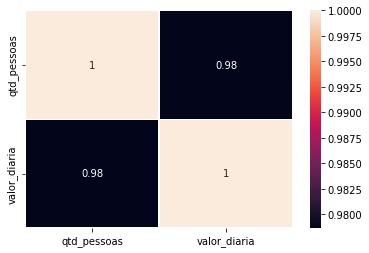

In [ ]:
correlacao = dados_custoDiaria.corr()
# plot da matriz de correlação em formato de gráfico
plot = sns.heatmap(correlacao, annot = True, linewidths=.3)
plot

Perceba que temos uma correlação forte positiva. Pois a medida que a quantidade de pessoas aumenta o preço da diária também aumenta. Além disso, podemos dizer que em 99% do valor cobrado pelas diárias pode ser explicado pela quantidade de pessoas alugando o imóvel.

Tratando os dados para o modelo

Nesse passo e realizado a transformação nos dados. Essa transformação é feita para que os dados possam ter o formato que o algoritmo solicitado como entrada.

In [ ]:
[] #Visualizar o formato da variável
X_custo_diaria.shape #

(30,)

In [ ]:
[] # visualizando variável
X_custo_diaria # o resultado mostra que temos um array com apenas uma coluna/dimensão. No entanto, precisamos ter uma matriz com 2 colunas.

array([ 1,  3,  4,  6,  7, 10, 12, 13, 15, 16, 20, 18, 22, 23, 25, 27, 30,
       32, 33, 40, 42, 43, 45, 47, 50, 51, 52, 53, 58, 60])

In [ ]:
[] #
X_custo_diaria = X_custo_diaria.reshape(-1,1)
X_custo_diaria

array([[ 1],
       [ 3],
       [ 4],
       [ 6],
       [ 7],
       [10],
       [12],
       [13],
       [15],
       [16],
       [20],
       [18],
       [22],
       [23],
       [25],
       [27],
       [30],
       [32],
       [33],
       [40],
       [42],
       [43],
       [45],
       [47],
       [50],
       [51],
       [52],
       [53],
       [58],
       [60]])

In [ ]:
[] # Agora temos uma matriz com duas colunas. 10 linhas e uma coluna
X_custo_diaria.shape

(30, 1)

# Aplicando os dados ao algoritmo de machine de regressão

In [ ]:
from sklearn.linear_model import LinearRegression
# cria um onjeto do tipo regressão linear
previsao_custo_diaria = LinearRegression()

In [ ]:
type(previsao_custo_diaria)

sklearn.linear_model._base.LinearRegression

# Realizando o treinamento do modelo

In [ ]:
 previsao_custo_diaria.fit(X_custo_diaria, Y_custo_diaria)

LinearRegression()

In [ ]:
# Qual o valor retornado intercept da previsão? ::
previsao_custo_diaria.intercept_

186.00229281307384

In [ ]:
#veificando o coeficiente angular da reta :: Qual é o valor do coeficiente angular da reta regressão?::
previsao_custo_diaria.coef_

array([51.14094547])

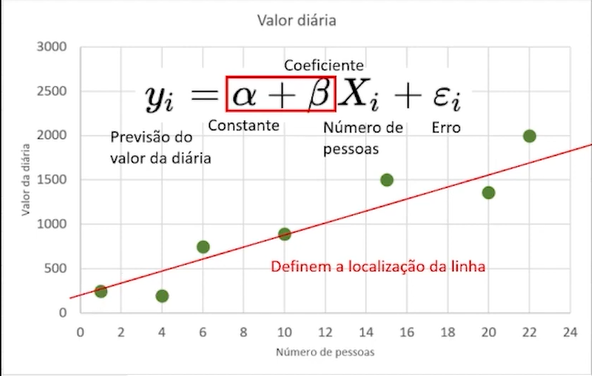

In [ ]:
previsao_precos = previsao_custo_diaria.predict(X_custo_diaria) #Baseado nos valores de nº de pessoas, vamos estimar/prever o custo do imóvel alugado.

In [ ]:
#Visualiza das previsões para cada nº de pessoas
previsao_precos

array([ 237.14323829,  339.42512923,  390.5660747 ,  492.84796565,
        543.98891112,  697.41174754,  799.69363849,  850.83458396,
        953.1164749 , 1004.25742038, 1208.82120227, 1106.53931132,
       1311.10309321, 1362.24403869, 1464.52592963, 1566.80782058,
       1720.230657  , 1822.51254794, 1873.65349341, 2231.64011172,
       2333.92200267, 2385.06294814, 2487.34483909, 2589.62673003,
       2743.04956645, 2794.19051192, 2845.3314574 , 2896.47240287,
       3152.17713023, 3254.45902118])

# Visualizando no gráfico as disposições dos dados


Para visualizar os dados no grafico, temos que transformar os valores das variáveis para o formato de vetor. Para isso utilizamos o comando ravel()

In [ ]:
[] # verificando tipo da variavel X_custo_diaria
X_custo_diaria

array([[ 1],
       [ 3],
       [ 4],
       [ 6],
       [ 7],
       [10],
       [12],
       [13],
       [15],
       [16],
       [20],
       [18],
       [22],
       [23],
       [25],
       [27],
       [30],
       [32],
       [33],
       [40],
       [42],
       [43],
       [45],
       [47],
       [50],
       [51],
       [52],
       [53],
       [58],
       [60]])

In [ ]:
X_custo_diaria.ravel() #transformando em um vetor 

array([ 1,  3,  4,  6,  7, 10, 12, 13, 15, 16, 20, 18, 22, 23, 25, 27, 30,
       32, 33, 40, 42, 43, 45, 47, 50, 51, 52, 53, 58, 60])

In [ ]:
Y_custo_diaria

array([ 150,  200,  650,  499,  549,  980,  700,  735,  859,  900, 1100,
        989, 1075, 1378, 1500, 1755, 1850, 2500, 2000, 1900, 2089, 2500,
       2250, 2488, 2680, 2803, 2890, 3040, 3150, 3300])

In [ ]:
grafico = px.scatter( x = X_custo_diaria.ravel(), y = Y_custo_diaria) #Mostrando em um grafico as disposições dos valores
grafico.show()

In [ ]:
grafico = px.scatter( x = X_custo_diaria.ravel(), y = Y_custo_diaria) 
grafico.add_scatter( x = X_custo_diaria.ravel(), y = previsao_precos, name= 'Previsões') 
grafico.show()

In [ ]:
#verificando os valores de uma determinada previsão baseada na quantidade de pessoas
qtd_pessoas = 8
previsao_custo_diaria.intercept_+previsao_custo_diaria.coef_*qtd_pessoas

array([595.12985659])

In [ ]:
qtd_pessoas = 17
previsao_custo_diaria.intercept_+previsao_custo_diaria.coef_*qtd_pessoas

array([1055.39836585])

In [ ]:
#verificando de modo direto
previsao_custo_diaria.predict([[8]])

array([595.12985659])

In [ ]:
#Indica a qualidade do algoritmo do algoritmo (Quanto mais próximo de 1, melhor a qualidade do modelo)
previsao_custo_diaria.score(X_custo_diaria, Y_custo_diaria)

0.9577871649322629

In [ ]:
#Visualizando os erros do modelo
from sklearn.metrics import mean_squared_error, mean_absolute_error
MSE = mean_squared_error(Y_custo_diaria, previsao_precos)

In [ ]:
#calculando MAR erro absoluto mean_absolute_error
mean_absolute_error(Y_custo_diaria, previsao_precos)

138.91296481574125

In [ ]:
# Calculando RMS - mean_squared_error
np.sqrt(MSE)

192.0095789285297